In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [78]:
df = pd.read_excel('raw.xlsx')
df.head()

status  card_present_flag bpay_biller_code         account currency  \
0  authorized                1.0              NaN  ACC-1598451071      AUD   
1  authorized                0.0              NaN  ACC-1598451071      AUD   
2  authorized                1.0              NaN  ACC-1222300524      AUD   
3  authorized                1.0              NaN  ACC-1037050564      AUD   
4  authorized                1.0              NaN  ACC-1598451071      AUD   

        long_lat txn_description                           merchant_id  \
0  153.41 -27.95             POS  81c48296-73be-44a7-befa-d053f48ce7cd   
1  153.41 -27.95       SALES-POS  830a451c-316e-4a6a-bf25-e37caedca49e   
2  151.23 -33.94             POS  835c231d-8cdf-4e96-859d-e9d571760cf0   
3  153.10 -27.66       SALES-POS  48514682-c78a-4a88-b0da-2d6302e64673   
4  153.41 -27.95       SALES-POS  b4e02c10-0852-4273-b8fd-7b3395e32eb0   

   merchant_code first_name  ...  age merchant_suburb merchant_state  \
0            NaN      Diana  ...   26         Ashmore            QLD   
1            NaN      Diana  ...   26          Sydney            NSW   
2            NaN    Michael  ...   38          Sydney            NSW   
3            NaN     Rhonda  ...   40         Buderim            QLD   
4            NaN      Diana  ...   26   Mermaid Beach            QLD   

                     extraction amount                    transaction_id  \
0  2018-08-01T01:01:15.000+0000  16.25  a623070bfead4541a6b0fff8a09e706c   
1  2018-08-01T01:13:45.000+0000  14.19  13270a2a902145da9db4c951e04b51b9   
2  2018-08-01T01:26:15.000+0000   6.42  feb79e7ecd7048a5a36ec889d1a94270   
3  2018-08-01T01:38:45.000+0000  40.90  2698170da3704fd981b15e64a006079e   
4  2018-08-01T01:51:15.000+0000   3.25  329adf79878c4cf0aeb4188b4691c266   

     country     customer_id merchant_long_lat movement  
0  Australia  CUS-2487424745     153.38 -27.99    debit  
1  Australia  CUS-2487424745     151.21 -33.87    debit  
2  Australia  CUS-2142601169     151.21 -33.87    debit  
3  Australia  CUS-1614226872     153.05 -26.68    debit  
4  Australia  CUS-2487424745     153.44 -28.06    debit  

[5 rows x 23 columns]

In [79]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [80]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [81]:
df['amount'].mean()

187.93358797641767

[Text(0, 0.5, 'total transactions')]

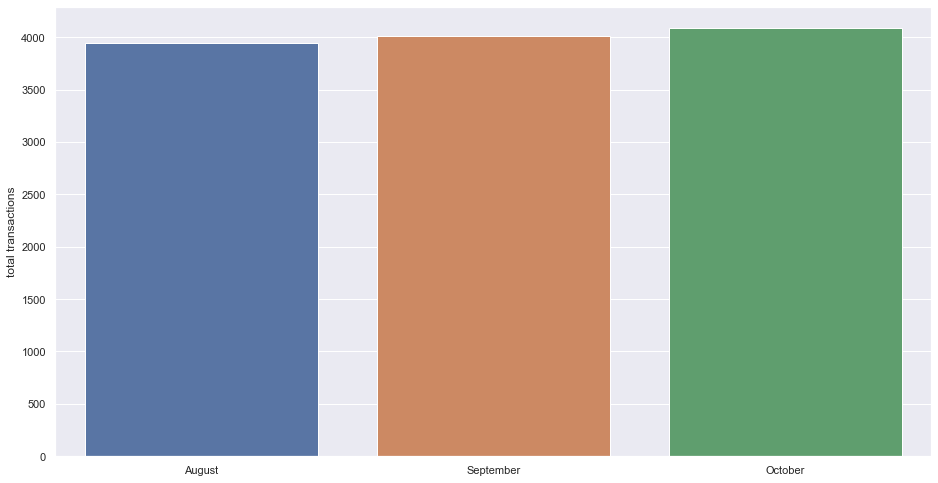

In [113]:
temp = df.groupby(by=df['date'].dt.month).count()['first_name']
ax = sns.barplot(x=['August','September','October'],y=temp)
ax.set(ylabel='total transactions')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 <a list of 91 Text xticklabel objects>)

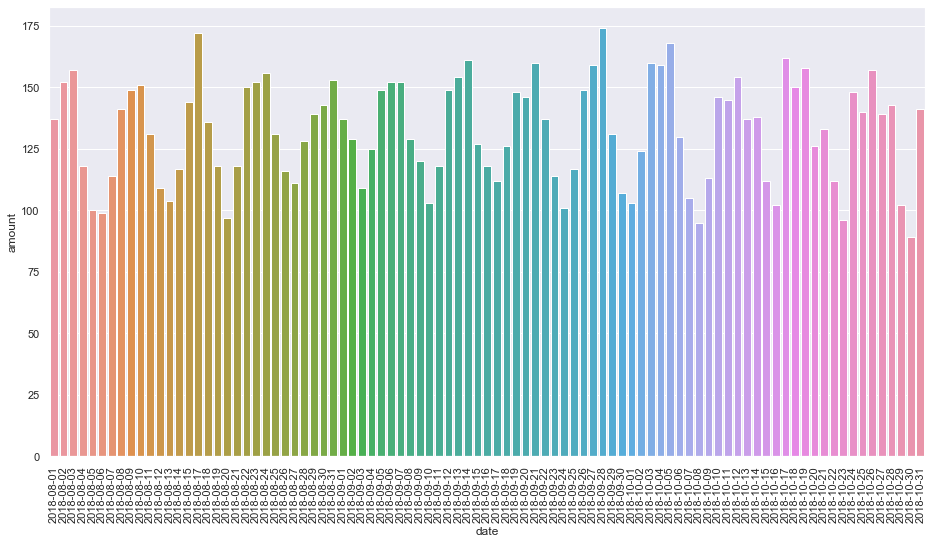

In [116]:
temp = df.groupby(by=df['date'].dt.date).count()['amount']
g = sns.set(rc={'figure.figsize':(15.7,8.27)})
g = sns.barplot(x=temp.index,y=temp)
plt.xticks(rotation=90)

In [85]:
df['lat'] = 0.0
df['long'] = 0.0
for i in df.index:
    df['long'].iloc[i] = float(df['long_lat'].iloc[i].split(' ')[0])
    df['lat'].iloc[i] = float(df['long_lat'].iloc[i].split(' ')[1])

D:\Programs\conda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [86]:
type(df['long'])

pandas.core.series.Series

In [117]:
map_osm = folium.Map(location=[-25.734968, 134.489563], zoom_start=6)
for lat, lng in zip(df['lat'], df['long']):
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_osm) 
map_osm